In [2]:
import gym
env = gym.make('CartPole-v1')

In [6]:
env = gym.make("LunarLander-v2", render_mode="human")
observation, info = env.reset()

for _ in range(1000):
    action = env.action_space.sample()  # agent policy that uses the observation and info
    observation, reward, terminated, truncated, info = env.step(action)

    if terminated or truncated:
        observation, info = env.reset()+

env.close()

c:\Users\tzn24\anaconda3\envs\COSRL\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


KeyboardInterrupt: 

: 

In [24]:
    import numpy as np
    from scipy.optimize import minimize

    CPc = 10000  
    CPh = 10000  
    U = [40, 80, 120]  
    Th_in = [300, 400, 600]  
    Tc_in = 100  
    Tc_out_target = 500  
    Area=[0,0,0]

    # 定义初值
    Tc_out_initial = [200, 300, 400]
    Th_out_initial = [250, 350, 450]
    x0 = Tc_out_initial + Th_out_initial
    bounds = [(100, 300), (100, 400), (100, 600), (100, 600), (100, 600), (100, 600)]

    def objective(x):
        Tc_out = x[:3]
        Th_out = x[3:]
        A_total = 0
        for i in range(3):
            Q = CPc * (Tc_out[i] - (Tc_in if i == 0 else Tc_out[i-1]))
            delta_T1 = Th_in[i] - Tc_out[i]
            delta_T2 = Th_out[i] - (Tc_in if i == 0 else Tc_out[i-1])
            if abs(delta_T1-delta_T2)<0.00001:
                delta_Tm = (delta_T1+delta_T2)/2
            else:
                delta_Tm = (delta_T1 - delta_T2) / np.log(delta_T1 / delta_T2)
            A = Q / (U[i] * delta_Tm)
            Area[i]=A
            A_total += A
        return A_total

    # 约束条件
    def constraints(x):
        Tc_out = x[:3]
        Th_out = x[3:]
        con = np.zeros(4)
        con[0] = CPc * (Tc_out[0] - Tc_in) - CPh * (Th_in[0] - Th_out[0])
        con[1] = CPc * (Tc_out[1] - Tc_out[0]) - CPh * (Th_in[1] - Th_out[1])
        con[2] = CPc * (Tc_out[2] - Tc_out[1]) - CPh * (Th_in[2] - Th_out[2])
        con[3] = Tc_out[2] - Tc_out_target
        return con

    cons = [{'type': 'eq', 'fun': lambda x: constraints(x)[0]},
            {'type': 'eq', 'fun': lambda x: constraints(x)[1]},
            {'type': 'eq', 'fun': lambda x: constraints(x)[2]},
            {'type': 'eq', 'fun': lambda x: constraints(x)[3]}]

    result = minimize(objective, x0, bounds=bounds, constraints=cons, method='SLSQP', options={'disp': True, 'maxiter': 1000})
    Tc_out_opt = result.x[:3]
    Th_out_opt = result.x[3:]
    print(f'总换热面积最小值: {result.fun:.2f} m²')
    print(f'换热器面积依次为：{Area[0]:.2f},{Area[1]:.2f},{Area[2]:.2f} m²')
    print(f'冷流体出口温度: {Tc_out_opt[0]:.2f}, {Tc_out_opt[1]:.2f}, {Tc_out_opt[2]:.2f} ℃')
    print(f'热流体出口温度: {Th_out_opt[0]:.2f}, {Th_out_opt[1]:.2f}, {Th_out_opt[2]:.2f} ℃')


Optimization terminated successfully    (Exit mode 0)
            Current function value: 311.8867239273407
            Iterations: 15
            Function evaluations: 105
            Gradient evaluations: 15
总换热面积最小值: 311.89 m²
换热器面积依次为：0.00,51.78,260.11 m²
冷流体出口温度: 100.00, 187.87, 500.00 ℃
热流体出口温度: 300.00, 312.13, 287.87 ℃


In [4]:
gym.envs.registry.keys()

dict_keys(['CartPole-v0', 'CartPole-v1', 'MountainCar-v0', 'MountainCarContinuous-v0', 'Pendulum-v1', 'Acrobot-v1', 'LunarLander-v2', 'LunarLanderContinuous-v2', 'BipedalWalker-v3', 'BipedalWalkerHardcore-v3', 'CarRacing-v2', 'Blackjack-v1', 'FrozenLake-v1', 'FrozenLake8x8-v1', 'CliffWalking-v0', 'Taxi-v3', 'Reacher-v2', 'Reacher-v4', 'Pusher-v2', 'Pusher-v4', 'InvertedPendulum-v2', 'InvertedPendulum-v4', 'InvertedDoublePendulum-v2', 'InvertedDoublePendulum-v4', 'HalfCheetah-v2', 'HalfCheetah-v3', 'HalfCheetah-v4', 'Hopper-v2', 'Hopper-v3', 'Hopper-v4', 'Swimmer-v2', 'Swimmer-v3', 'Swimmer-v4', 'Walker2d-v2', 'Walker2d-v3', 'Walker2d-v4', 'Ant-v2', 'Ant-v3', 'Ant-v4', 'Humanoid-v2', 'Humanoid-v3', 'Humanoid-v4', 'HumanoidStandup-v2', 'HumanoidStandup-v4'])

In [12]:
import numpy as np

class MultiArmedBandit:
    def __init__(self, n_arms, true_means):
        self.n_arms = n_arms
        self.true_means = true_means
        self.estimated_means = np.zeros(n_arms)
        self.arm_counts = np.zeros(n_arms)
        
    def pull_arm(self, arm):
        # 模拟拉动臂的回报
        reward = np.random.normal(self.true_means[arm], 1.0)
        return reward
    
    def update_estimates(self, arm, reward):
        # 更新估计的回报期望值
        self.arm_counts[arm] += 1
        self.estimated_means[arm] += (reward - self.estimated_means[arm]) / self.arm_counts[arm]
    
    def select_arm(self):
        # 选择估计回报最高的臂
        return np.argmax(self.estimated_means)
    
    def run(self, n_steps):
        rewards = np.zeros(n_steps)
        for step in range(n_steps):
            arm = self.select_arm()
            reward = self.pull_arm(arm)
            self.update_estimates(arm, reward)
            rewards[step] = reward
        return rewards

# 设置参数
n_arms = 5
true_means = [1.0, 1.5, 2.0, 1.2, 1.8]  # 每个臂的真实回报期望值
n_steps = 1000  # 运行的步数

# 创建多臂赌博机实例
mab = MultiArmedBandit(n_arms, true_means)

# 运行贪心算法
rewards = mab.run(n_steps)

# 计算总回报和平均回报
total_reward = np.sum(rewards)
average_reward = np.mean(rewards)

print(f"Total reward: {total_reward}")
print(f"Average reward: {average_reward}")
print(f"Estimated means: {mab.estimated_means}")
print(f"True means: {true_means}")
print(f"Number of times each arm was pulled: {mab.arm_counts}")


Total reward: 990.632401337379
Average reward: 0.990632401337379
Estimated means: [0.9906324 0.        0.        0.        0.       ]
True means: [1.0, 1.5, 2.0, 1.2, 1.8]
Number of times each arm was pulled: [1000.    0.    0.    0.    0.]


In [14]:
import numpy as np

class EpsilonGreedyMultiArmedBandit:
    def __init__(self, n_arms, true_means, epsilon):
        self.n_arms = n_arms
        self.true_means = true_means
        self.epsilon = epsilon
        self.estimated_means = np.zeros(n_arms)
        self.arm_counts = np.zeros(n_arms)
        
    def pull_arm(self, arm):
        # 模拟拉动臂的回报
        reward = np.random.normal(self.true_means[arm], 1.0)
        return reward
    
    def update_estimates(self, arm, reward):
        # 更新估计的回报期望值
        self.arm_counts[arm] += 1
        self.estimated_means[arm] += (reward - self.estimated_means[arm]) / self.arm_counts[arm]
    
    def select_arm(self):
        # \(\epsilon\)-贪心策略选择臂
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.n_arms)
        else:
            return np.argmax(self.estimated_means)
    
    def run(self, n_steps):
        rewards = np.zeros(n_steps)
        for step in range(n_steps):
            arm = self.select_arm()
            reward = self.pull_arm(arm)
            self.update_estimates(arm, reward)
            rewards[step] = reward
        return rewards

# 设置参数
n_arms = 5
true_means = [1.0, 1.5, 2.0, 1.2, 1.8]  # 每个臂的真实回报期望值
n_steps = 10000  # 运行的步数
epsilon = 0.1  # 探索概率

# 创建多臂赌博机实例
mab = EpsilonGreedyMultiArmedBandit(n_arms, true_means, epsilon)

# 运行\(\epsilon\)-贪心算法
rewards = mab.run(n_steps)

# 计算总回报和平均回报
total_reward = np.sum(rewards)
average_reward = np.mean(rewards)

print(f"Total reward: {total_reward}")
print(f"Average reward: {average_reward}")
print(f"Estimated means: {mab.estimated_means}")
print(f"True means: {true_means}")
print(f"Number of times each arm was pulled: {mab.arm_counts}")


Total reward: 19628.603930362322
Average reward: 1.9628603930362323
Estimated means: [1.02223073 1.47460019 2.01773565 1.24739745 1.80063492]
True means: [1.0, 1.5, 2.0, 1.2, 1.8]
Number of times each arm was pulled: [ 215.  235. 9116.  204.  230.]


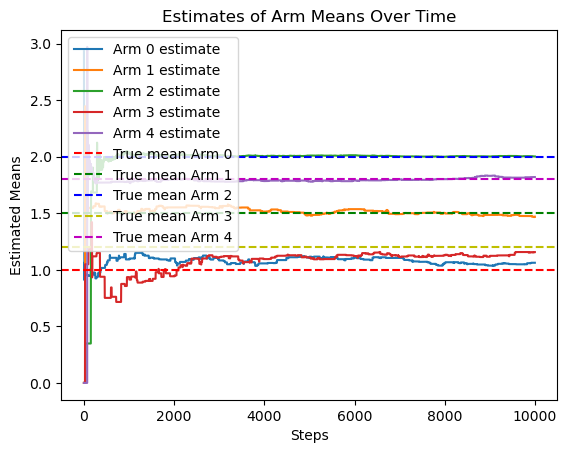

In [17]:
import numpy as np
import matplotlib.pyplot as plt

class EpsilonGreedyMultiArmedBandit:
    def __init__(self, n_arms, true_means, epsilon):
        self.n_arms = n_arms
        self.true_means = true_means
        self.epsilon = epsilon
        self.estimated_means = np.zeros(n_arms)
        self.arm_counts = np.zeros(n_arms)
        
    def pull_arm(self, arm):
        reward = np.random.normal(self.true_means[arm], 1.0)
        return reward
    
    def update_estimates(self, arm, reward):
        self.arm_counts[arm] += 1
        self.estimated_means[arm] += (reward - self.estimated_means[arm]) / self.arm_counts[arm]
    
    def select_arm(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.n_arms)
        else:
            return np.argmax(self.estimated_means)
    
    def run(self, n_steps):
        rewards = np.zeros(n_steps)
        estimates_over_time = np.zeros((n_steps, self.n_arms))
        for step in range(n_steps):
            arm = self.select_arm()
            reward = self.pull_arm(arm)
            self.update_estimates(arm, reward)
            rewards[step] = reward
            estimates_over_time[step, :] = self.estimated_means
        return rewards, estimates_over_time

# 设置参数
n_arms = 5
true_means = [1.0, 1.5, 2.0, 1.2, 1.8]
n_steps = 10000
epsilon = 0.1

# 创建多臂赌博机实例
mab = EpsilonGreedyMultiArmedBandit(n_arms, true_means, epsilon)

# 运行\(\epsilon\)-贪心算法
rewards, estimates_over_time = mab.run(n_steps)

# 绘制估计值变化曲线
for arm in range(n_arms):
    plt.plot(estimates_over_time[:, arm], label=f'Arm {arm} estimate')

plt.axhline(y=true_means[0], color='r', linestyle='--', label='True mean Arm 0')
plt.axhline(y=true_means[1], color='g', linestyle='--', label='True mean Arm 1')
plt.axhline(y=true_means[2], color='b', linestyle='--', label='True mean Arm 2')
plt.axhline(y=true_means[3], color='y', linestyle='--', label='True mean Arm 3')
plt.axhline(y=true_means[4], color='m', linestyle='--', label='True mean Arm 4')

plt.xlabel('Steps')
plt.ylabel('Estimated Means')
plt.legend()
plt.title('Estimates of Arm Means Over Time')
plt.show()


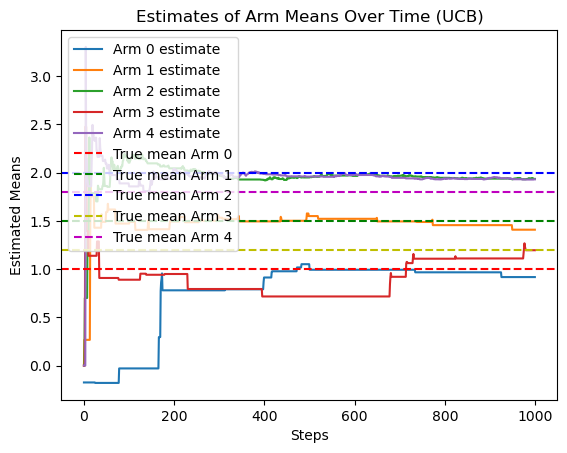

In [16]:
import numpy as np
import matplotlib.pyplot as plt

class UCBMultiArmedBandit:
    def __init__(self, n_arms, true_means, c):
        self.n_arms = n_arms
        self.true_means = true_means
        self.c = c
        self.estimated_means = np.zeros(n_arms)
        self.arm_counts = np.zeros(n_arms)
        self.total_steps = 0
        
    def pull_arm(self, arm):
        reward = np.random.normal(self.true_means[arm], 1.0)
        return reward
    
    def update_estimates(self, arm, reward):
        self.arm_counts[arm] += 1
        self.estimated_means[arm] += (reward - self.estimated_means[arm]) / self.arm_counts[arm]
    
    def select_arm(self):
        self.total_steps += 1
        if 0 in self.arm_counts:
            return np.argmin(self.arm_counts)
        ucb_values = self.estimated_means + self.c * np.sqrt(np.log(self.total_steps) / self.arm_counts)
        return np.argmax(ucb_values)
    
    def run(self, n_steps):
        rewards = np.zeros(n_steps)
        estimates_over_time = np.zeros((n_steps, self.n_arms))
        for step in range(n_steps):
            arm = self.select_arm()
            reward = self.pull_arm(arm)
            self.update_estimates(arm, reward)
            rewards[step] = reward
            estimates_over_time[step, :] = self.estimated_means
        return rewards, estimates_over_time

# 设置参数
n_arms = 5
true_means = [1.0, 1.5, 2.0, 1.2, 1.8]
n_steps = 1000
c = 2  # 调节参数

# 创建多臂赌博机实例
mab = UCBMultiArmedBandit(n_arms, true_means, c)

# 运行UCB算法
rewards, estimates_over_time = mab.run(n_steps)

# 绘制估计值变化曲线
for arm in range(n_arms):
    plt.plot(estimates_over_time[:, arm], label=f'Arm {arm} estimate')

plt.axhline(y=true_means[0], color='r', linestyle='--', label='True mean Arm 0')
plt.axhline(y=true_means[1], color='g', linestyle='--', label='True mean Arm 1')
plt.axhline(y=true_means[2], color='b', linestyle='--', label='True mean Arm 2')
plt.axhline(y=true_means[3], color='y', linestyle='--', label='True mean Arm 3')
plt.axhline(y=true_means[4], color='m', linestyle='--', label='True mean Arm 4')

plt.xlabel('Steps')
plt.ylabel('Estimated Means')
plt.legend()
plt.title('Estimates of Arm Means Over Time (UCB)')
plt.show()


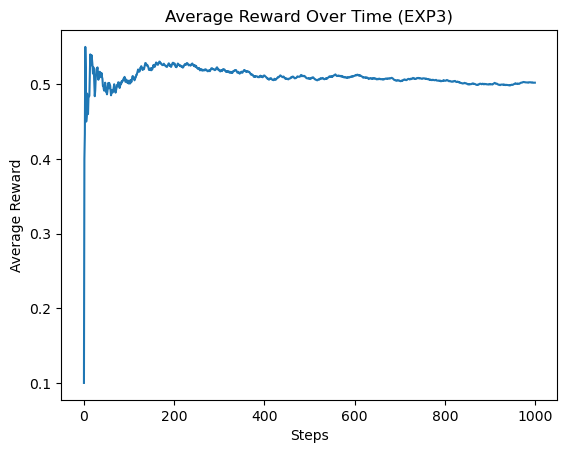

In [18]:
import numpy as np
import matplotlib.pyplot as plt

class EXP3MultiArmedBandit:
    def __init__(self, n_arms, gamma):
        self.n_arms = n_arms
        self.gamma = gamma
        self.weights = np.ones(n_arms)
        
    def select_arm(self):
        probabilities = (1 - self.gamma) * (self.weights / self.weights.sum()) + (self.gamma / self.n_arms)
        return np.random.choice(self.n_arms, p=probabilities)
    
    def update_weights(self, arm, reward, probabilities):
        estimated_reward = reward / probabilities[arm]
        self.weights[arm] *= np.exp(self.gamma * estimated_reward / self.n_arms)
    
    def run(self, n_steps, true_rewards):
        rewards = np.zeros(n_steps)
        for step in range(n_steps):
            probabilities = (1 - self.gamma) * (self.weights / self.weights.sum()) + (self.gamma / self.n_arms)
            arm = self.select_arm()
            reward = np.random.choice(true_rewards[arm])
            self.update_weights(arm, reward, probabilities)
            rewards[step] = reward
        return rewards

# 设置参数
n_arms = 5
gamma = 0.1
n_steps = 1000
true_rewards = [
    [0.9, 0.1],  # Arm 0
    [0.2, 0.8],  # Arm 1
    [0.7, 0.3],  # Arm 2
    [0.4, 0.6],  # Arm 3
    [0.5, 0.5]   # Arm 4
]

# 创建多臂赌博机实例
mab = EXP3MultiArmedBandit(n_arms, gamma)

# 运行EXP3算法
rewards = mab.run(n_steps, true_rewards)

# 绘制平均回报曲线
plt.plot(np.cumsum(rewards) / (np.arange(n_steps) + 1))
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Average Reward Over Time (EXP3)')
plt.show()
